<a href="https://colab.research.google.com/github/Rohit5950/YULU-CASE-STUDY/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* INTRODUCTION

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2024-07-24 09:38:06--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.71, 18.64.229.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.3’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2024-07-24 09:38:06 (11.2 MB/s) - ‘bike_sharing.csv?1642089089.3’ saved [648353/648353]



In [ ]:
data = pd.read_csv("bike_sharing.csv?1642089089")

# Data Exploration

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Checking For The Null Value

In [ ]:
null_val = data.isna().sum()
null_val

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

# Basic Data Analysis

In [ ]:
print(f"The given dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
print()
print(f"The given dataset contains {data.size} elements")
print()
print(f"The given dataset has {data.duplicated().sum()} duplicated values")
print()
print(f"The given dataset has {null_val.values.sum()} null / Nan values")

The given dataset contains 10886 rows and 12 columns

The given dataset contains 130632 elements

The given dataset has 0 duplicated values

The given dataset has 0 null / Nan values


# Identifying Unique Values Present In Each Columns

In [ ]:
for i in data.columns:
  print(f"The number of unique values present in {i} is {data[i].nunique()}")
  print()

The number of unique values present in datetime is 10886

The number of unique values present in season is 4

The number of unique values present in holiday is 2

The number of unique values present in workingday is 2

The number of unique values present in weather is 4

The number of unique values present in temp is 49

The number of unique values present in atemp is 60

The number of unique values present in humidity is 89

The number of unique values present in windspeed is 28

The number of unique values present in casual is 309

The number of unique values present in registered is 731

The number of unique values present in count is 822



# Converting The Data Type Of Same Columns

In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["season"] = data["season"].astype('category')
data["holiday"] = data["holiday"].astype('category')
data["workingday"] = data["workingday"].astype('category')
data["weather"] = data["weather"].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10253,2012-11-12 15:00:00,4,1,0,1,22.96,26.515,64,16.9979,102,280,382
3202,2011-08-03 08:00:00,3,0,1,2,30.34,33.335,51,11.0014,29,408,437
10112,2012-11-06 17:00:00,4,0,1,1,13.12,15.150,53,15.0013,30,597,627
8866,2012-08-11 19:00:00,3,0,0,2,27.06,29.545,89,7.0015,97,178,275
8160,2012-07-01 09:00:00,3,0,0,1,33.62,39.395,56,0.0000,51,168,219


# Univariate Analysis

In [ ]:
data["season"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
season_dict = {1: "spring", 2 : "summer", 3 : "fall", 4 : "winter"}
data["season"] = data["season"].map(season_dict)

In [ ]:
data["season"].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

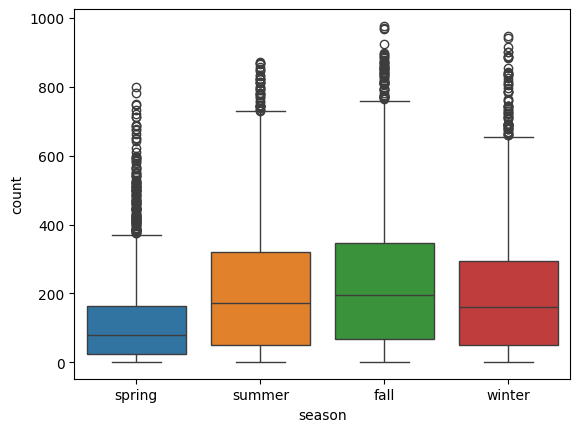

In [ ]:
sns.boxplot(x = data["season"], y = data["count"],hue =data["season"])
plt.show()

# **INSIGHTS**
The mean counts vary for different season.

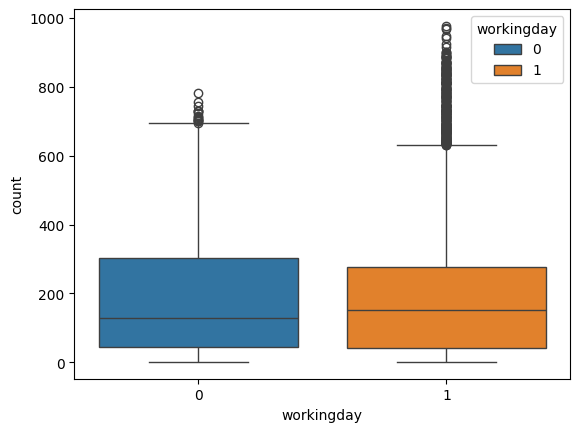

In [ ]:
sns.boxplot(x = data["workingday"], y = data["count"], hue=data["workingday"])
plt.show()

There is lots of outliers present

# **OUTLIER DETECTION**

In [ ]:
Q1 = np.percentile(data["count"],25)
Q3 = np.percentile(data["count"],75)
IQR = Q3 - Q1
data_v1 = data[(data["count"] > (Q1 - 1.5*IQR)) & (data["count"] < (Q3 + 1.5*IQR))]

In [ ]:
print(f"data befor removing outlier {data.shape[0]}")
print(f"data after removing outlier {data_v1.shape[0]}")

data befor removing outlier 10886
data after removing outlier 10583


In [ ]:
data_v1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data_v1["workingday"].value_counts()

workingday
1    7161
0    3422
Name: count, dtype: int64

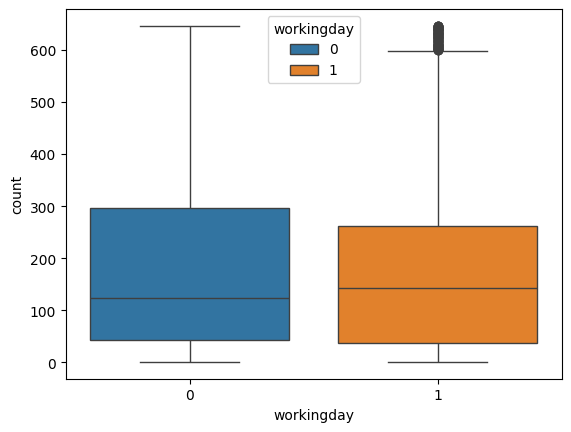

In [ ]:
sns.boxplot(x = data_v1["workingday"], y = data_v1["count"], hue = data_v1["workingday"])
plt.show()

# Count Distribution

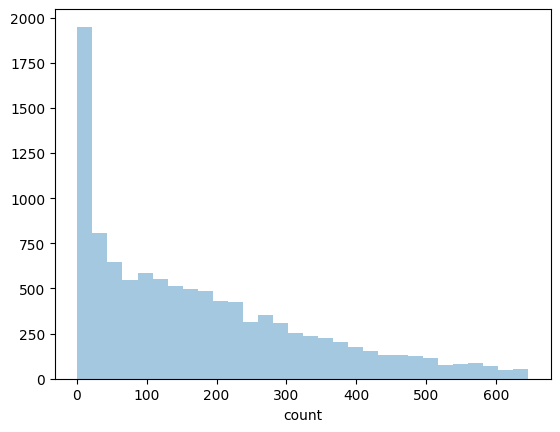

In [ ]:
sns.distplot(data_v1['count'], bins=30,hist=True,kde=False)
plt.show()

In [ ]:
data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8769,2012-08-07 18:00:00,fall,0,1,2,31.16,35.605,62,11.0014,103,711,814
3736,2011-09-06 15:00:00,fall,0,1,3,22.14,25.760,94,26.0027,18,71,89
394,2011-01-17 22:00:00,spring,1,0,3,5.74,6.060,93,16.9979,0,13,13
1245,2011-03-16 17:00:00,spring,0,1,2,18.04,21.970,54,19.9995,37,216,253
10494,2012-12-03 16:00:00,winter,0,1,1,24.60,31.060,53,8.9981,45,397,442


In [ ]:
holiday_map = {0:"non-holiday", 1:"holiday"}
data_v1["holiday"] = data_v1["holiday"].map(holiday_map)
data_v1["holiday"].value_counts()

holiday
non-holiday    10274
holiday          309
Name: count, dtype: int64

In [ ]:
data_v1["weather"].value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

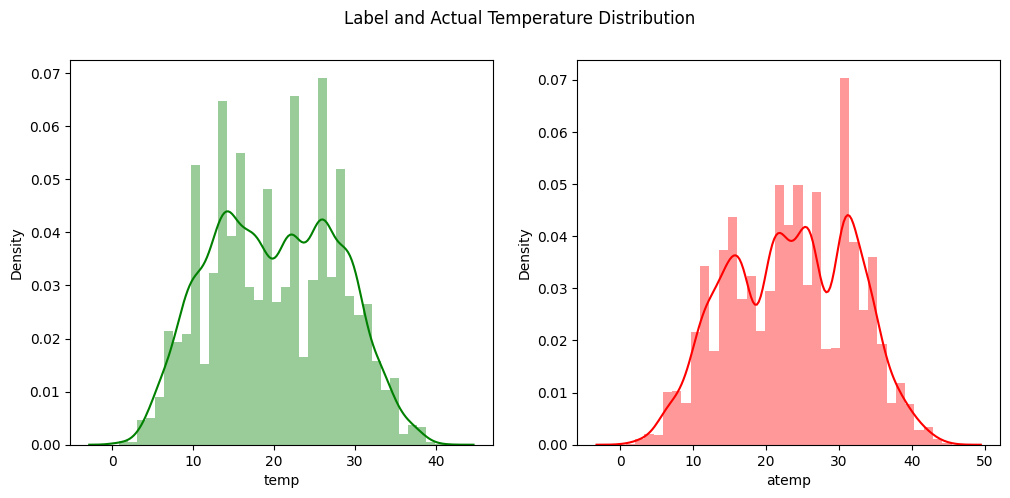

In [ ]:
# Providing the figuresize and axis

fig, ax = plt.subplots(1,2,figsize=(12,5))

# Lebel of the charts

plt.suptitle("Label and Actual Temperature Distribution")

# Plotting the charts

sns.distplot(data_v1["temp"], color = "green", ax = ax[0])
sns.distplot(data_v1["atemp"], color = "red", ax = ax[1])

# Showing the charts

plt.show()

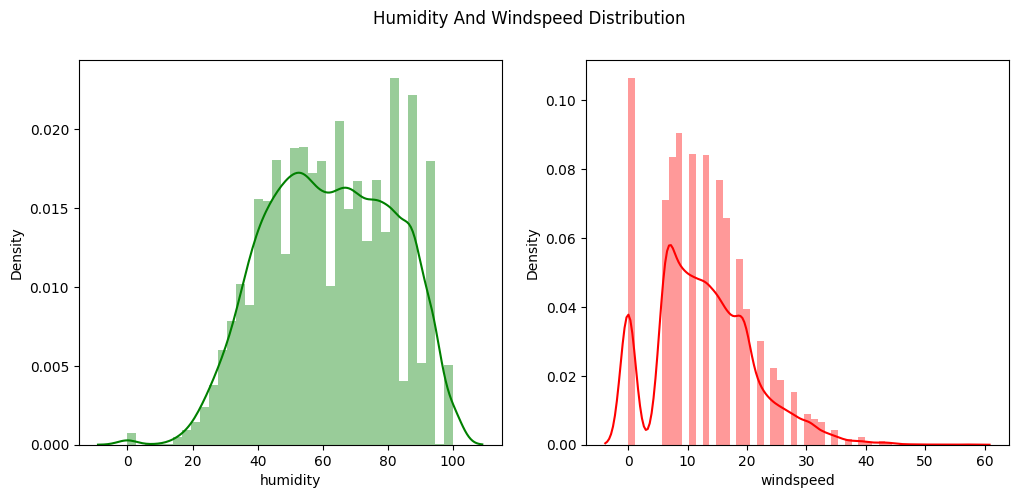

In [ ]:
# Providing the figuresize and axis

fig, ax = plt.subplots(1,2, figsize = (12,5))

# Lebel of the charts

plt.suptitle("Humidity And Windspeed Distribution")

# # Plotting the charts
sns.distplot(data_v1["humidity"], color = "green", ax = ax[0])
sns.distplot(data_v1["windspeed"], color = "red", ax = ax[1])

# Showing the charts

plt.show()

# **Multivariate Analysis**

In [ ]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


# Season Wise Count

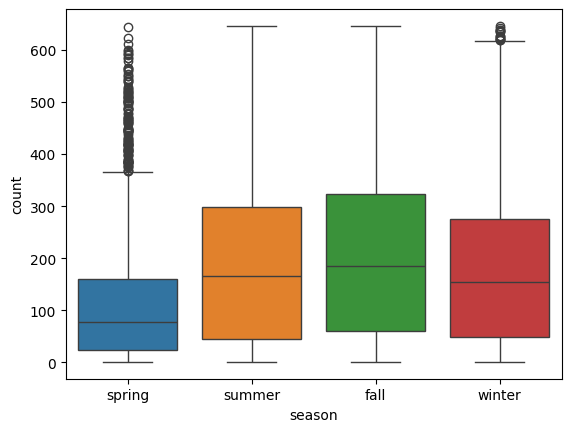

In [ ]:
sns.boxplot(x = data_v1["season"], y = data_v1["count"], hue = data_v1["season"])
plt.show()

# Holiday Wise Sum

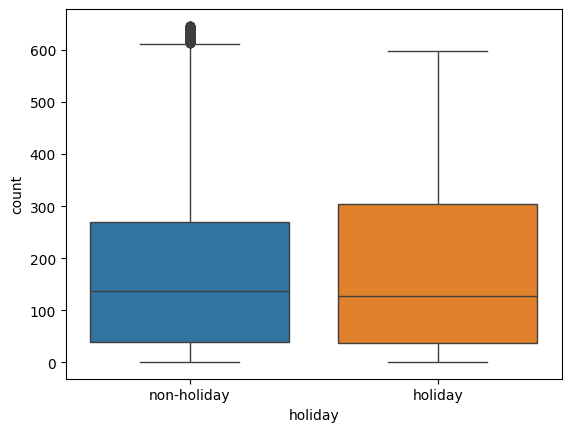

In [ ]:
sns.boxplot(x = data_v1["holiday"], y = data_v1["count"], hue =  data_v1["holiday"])
plt.show()

# **INSIGHT**

The median count of Holiday and Non-Holiday seems same. Need to perform some statistical test to get that confirm

# Workingday wise count

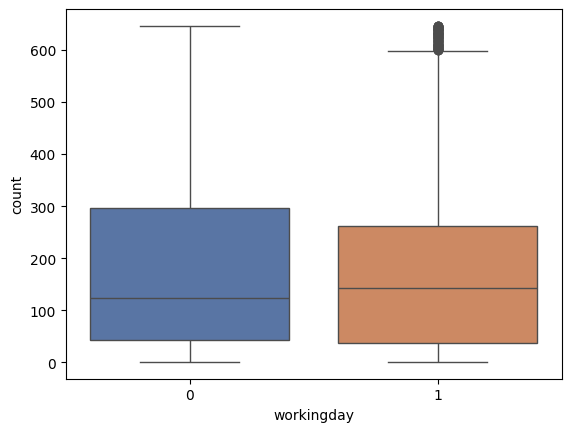

In [ ]:
sns.boxplot(x = data_v1["workingday"], y = data_v1["count"], palette = "deep")
plt.show()

# **INSIGHT**

The median count of working day seems same. Need to perform some statistical test to get that confirm

In [ ]:
data_v1["workingday"].value_counts()

workingday
1    7161
0    3422
Name: count, dtype: int64

In [ ]:
data_v1["holiday"].value_counts()

holiday
non-holiday    10274
holiday          309
Name: count, dtype: int64

# Weather wise count

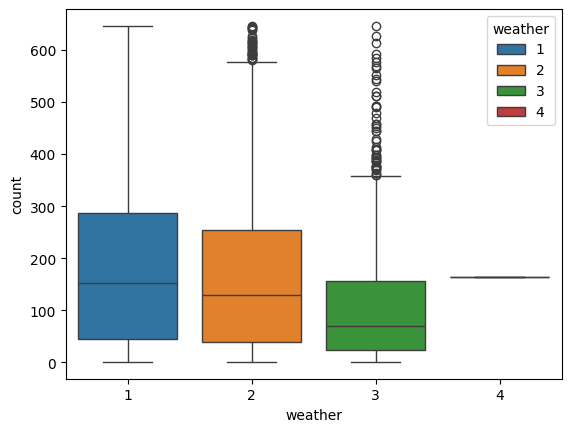

In [ ]:
sns.boxplot(x = data_v1["weather"], y = data_v1["count"], hue =data_v1["weather"])
plt.show()

# **HYPOTHESIS TESTING**

# Q1 - Working Day has effect on number of electric cycles rented?

In [ ]:
data_v1["workingday"].value_counts()

workingday
1    7161
0    3422
Name: count, dtype: int64

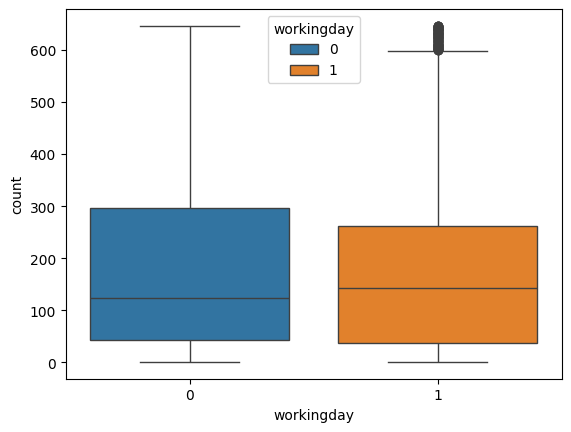

In [ ]:
sns.boxplot(x = data_v1["workingday"], y = data_v1["count"], hue = data_v1["workingday"])
plt.show()

In [ ]:
print("Population Standard Deviation")
data_v1.groupby("workingday")["count"].std().reset_index().rename(columns = {"count":"std"})

Population Standard Deviation


,workingday,std
0,0,163.782166
1,1,152.358993


In [ ]:
print("Population Mean")
data_v1.groupby("workingday")["count"].mean().reset_index().rename(columns = {"count": "mean"})

Population Mean


,workingday,mean
0,0,180.965517
1,1,173.011591


# Defining Null And Alternate Hypothesis


*   Null Hypothesis :  The count of weekday is equal to that of weekend
*   Alternate Hypothesis : The count of weekday is greate than that of weekend

In [ ]:
weekday = data_v1[data_v1["workingday"] == 1]["count"].sample(3422)
weekend = data_v1[data_v1["workingday"] == 0]["count"].sample(3422)

In [ ]:
print(f"sample standard deviation of weekday {weekday.std()}")
print()
print(f"sample standard deviation of weekend {weekend.std()}")

sample standard deviation of weekday 153.8612407675617

sample standard deviation of weekend 163.78216646075998


In [ ]:
print(f"sample mean of weekday {weekday.mean()}")
print()
print(f"sample mean of weekend {weekend.mean()}")

sample mean of weekday 172.10578609000584

sample mean of weekend 180.9655172413793


# Since we have two category to test against and the sample size is large enough N>=30. We are going to use Independent T-test and it will be one tailed test

In [ ]:
# Calculating the p-value

# Import the required function

from scipy.stats import ttest_ind

# find the p_value

ttest, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative = "greater")

print(f"Ttest -> {ttest}")
print(f"p_value -> {p_value}")

Ttest -> -2.3063434205399913
p_value -> 0.9894393472782349


In [ ]:
# With 0.05 is the significance level
# p is high null will fly
# Print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the Null hypothesis')

As the p-value 0.9894393472782349 is greater than the level of significance, we fail to reject the Null hypothesis


# Conclusion


*  The count of weekday is equal to that of weekend

#Q2- No. of cycles rented similar or different in different seasons



In [ ]:
data_v1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,non-holiday,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,non-holiday,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,non-holiday,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,non-holiday,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,non-holiday,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data_v1["season"].value_counts()

season
spring    2670
winter    2664
summer    2633
fall      2616
Name: count, dtype: int64

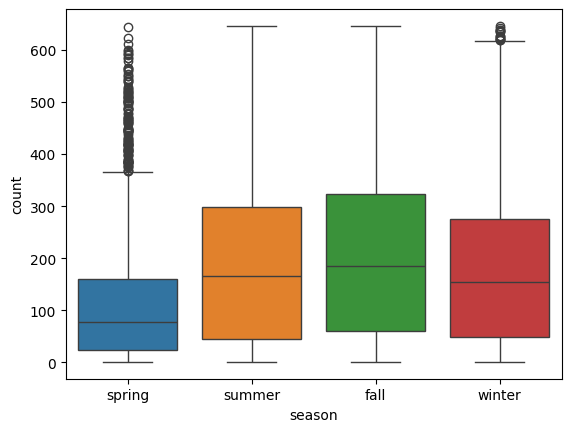

In [ ]:
sns.boxplot(x = data_v1["season"], y = data_v1["count"], hue = data_v1["season"])
plt.show()

In [ ]:
print("Population Standard Deviation")
data_v1.groupby("season")['count'].std().reset_index().rename(columns = {"count":"std"})

Population Standard Deviation


,season,std
0,spring,116.884929
1,summer,166.170802
2,fall,164.055532
3,winter,154.563069


In [ ]:
print("Population Mean")
data_v1.groupby("season")["count"].mean().reset_index().rename(columns = {"count":"mean"})

Population Mean


,season,mean
0,spring,112.795131
1,summer,195.653627
2,fall,210.484327
3,winter,184.404655


# Defining Null And Alternate Hypothesis


* Null Hypothesis - The no of cycles rented for different season are equal
* Alternate Hypothesis - The no of cycles rented for different season are different

In [ ]:
s1 = data_v1[data_v1["season"] == "fall"]["count"].sample(2616)
s2 = data_v1[data_v1["season"] == "spring"]["count"].sample(2616)
s3 = data_v1[data_v1["season"] == "summer"]["count"].sample(2616)
s4 = data_v1[data_v1["season"] == "winter"]["count"].sample(2616)

# Since we are dealing with more than two categorical comparision, we would need ANOVA here.



# ANOVA TEST



In [ ]:
#importing the required library
from scipy.stats import f_oneway

#find the p-value
test_stat, p_value = f_oneway(s1,s2,s3,s4)

print('The test_stat is',test_stat)
print('The p-value is',p_value)

The test_stat is 211.07562931763735
The p-value is 6.145932658126622e-133


In [ ]:
# With 0.05 is the significance level
# P is low null will go
# Print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject (accept) the Null hypothesis')

As the p-value 6.145932658126622e-133 is less than the level of significance, we reject the Null hypothesis


# Conclusion
* The no of cycles rented do vary with different season.

# Q3- No. of cycles rented similar or different in different weather

In [ ]:
data_v1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,non-holiday,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,non-holiday,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,non-holiday,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,non-holiday,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,non-holiday,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data_v1["weather"].value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

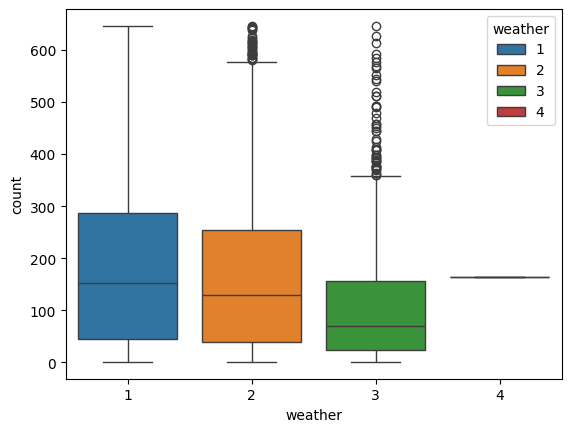

In [ ]:
sns.boxplot(x = data_v1["weather"], y = data_v1["count"], hue = data_v1["weather"])
plt.show()

In [ ]:
# let us explore the datasets

a = data_v1.loc[data_v1["weather"]==1,["count"]]["count"]
b = data_v1.loc[data_v1["weather"]==2,["count"]]["count"]
c = data_v1.loc[data_v1["weather"]==3,["count"]]["count"]
d = data_v1.loc[data_v1["weather"]==4,["count"]]["count"]

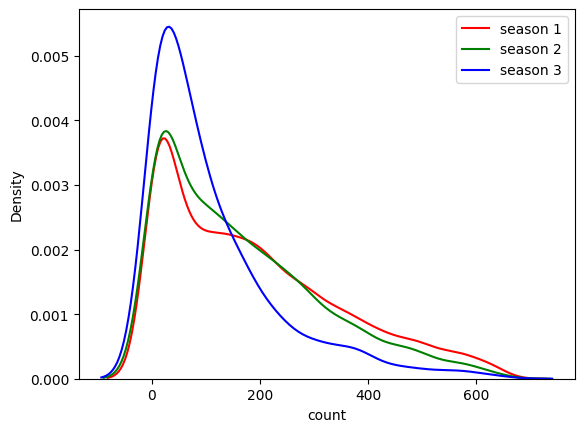

In [ ]:
sns.kdeplot(a, color = "red", label = "season 1")
sns.kdeplot(b, color = 'green', label = "season 2")
sns.kdeplot(c, color = 'blue', label = "season 3")
sns.kdeplot(d, color = 'black', label = "season 4")

plt.legend()

* Visually it seems that ridership in weather 3 is less as compared to other season. Let us prove this Mathematically using ANOVA test.

* Before we perform ANOVA test, let us check if the distribution is normal or not using Wilkin - Shapiro test.

In [ ]:
from scipy.stats import shapiro

In [ ]:
s_stat, p = shapiro(a)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis: Distribution is not normal")
else:
    print(f"p = {p}: Failed to reject null hypothesis: Distribution is normal")

p = 0.0: Reject null hypothesis: Distribution is not normal


In [ ]:
# Similarly if we perform shapiro test for all 3 datasets,

s_stat, p_b = shapiro(b)
s_stat, p_c = shapiro(c)
p_b, p_c,

(9.532115602307598e-39, 2.4638935234478347e-30)

* We observe that all 3 datasets do not show the charecteristics of normal distribution. Hence we need to perform Kruskal's test.

* **Null Hypothesis:** Number of people using the cycles is same across different weather.

* **Alternate Hypothesis:** Number of people using the cycles is different for different weather.

* **Test:** Kruskal's test

* **significance level:** 0.05

In [ ]:
from scipy.stats import kruskal

In [ ]:
kstat, p = kruskal(a, b, c)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 2.5747137072081145e-41: Reject null hypothesis


# **INSIGHT**

We conclude that number of people using cycle is different for different weather.

# **TEST**
Now let us test this using **ANOVA** test.

* **Null Hypothesis:** Number of people using the cycles is same across different weather.

* **Alternate Hypothesis:** Number of people using the cycles is different for different weather.

* **Test:** ANOVA test

* **significance level:**  0.05


In [ ]:
# ANOVA

fstat, p = f_oneway(a, b, c)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 2.749873188252358e-42: Reject null hypothesis


# Conclusion

* Since p<<0.05, we will reject the null hypothesis and conclude that ridership is different at different weather.

# Q4 - Weather is dependent on season

In [ ]:
data_v1.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,non-holiday,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,non-holiday,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
# First let us explore the datasets
a = pd.crosstab(data_v1["season"], data_v1["weather"])
print(a)

weather     1    2    3  4
season                    
spring   1744  714  211  1
summer   1720  690  223  0
fall     1842  579  195  0
winter   1656  787  221  0



# Now let us perform Chi-square test to check whether season is dependent on weather.#

* **Null Hypothesis:** Weather is independent from season.

* **Alternate Hypothesis:** Weather is dependent on season.

* **Test:** Chi square test of independence

* **significance level:** 0.05

# **Chi square test of independence**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_stat, p_value, dof, exp_arr = chi2_contingency(a)

print(f"chi stats is {chi_stat}")
print()
print(f"p value is {p_value}")
print()
print(f"Degree of freedom {dof}")


chi stats is 47.16590591959626

p value is 3.6550317439064943e-07

Degree of freedom 9


In [ ]:
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 2.749873188252358e-42: Reject null hypothesis



# Conclusion:

* Since p<<0.05, we will reject the null hypothesis and conclude that weather is indeed dependent on season.

# **Final Insight And Recommendation**

* When compared to other seasons, during the fall and summer seasons, there is a higher demand for the rental bikes.

* Also, bike rentals seems to be increased during holidays.

* When considering rainy, thunderstorm, foggy or snowy weather
conditions, there is a significant reduction in bike rentals.

* Furthermore, the number of bike rentals shows significant drop when humidity lowers below 20.

* During the Fall and summer seasons, the Company should ensure larger stocks of bike for rentals..

* With a significane value of 5% (0.05), we see there is no significant effect if working day on the no. of bikes being rented.

* It is recommended for the company to reduce the number of bikes in places where there is low humidity.

* Similarly, in the places where windspeed is more than 35 or during tunderstroms, it is recommended to reduce the rental bike stocks.

* It is recommended that the company should invest in weather monitoring systems, such that it can adjust the availability of bikes based on different climatic conditions.